In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
df = pd.read_csv("/content/nginx_logs - Copy.txt")

In [6]:
df.head() # to see what is our data looks like

,"74.240.191.221 - - [25/Jun/2024:00:06:22 +0000] ""DELETE /index.html?product_id=585&user_id=218 HTTP/1.1"" 200 1974"
0,"15.89.35.67 - - [24/Jun/2024:04:43:22 +0000] ""..."
1,158.20.204.46 - - [21/Jun/2024:14:54:22 +0000]...
2,158.20.204.46 - - [21/Jun/2024:14:54:22 +0000]...
3,238.189.173.32 - - [21/Jun/2024:21:33:22 +0000...
4,190.111.164.7 - - [26/Jun/2024:09:03:22 +0000]...


In [7]:
def extract_fields(log_entry):
    pattern = (
        r'(?P<ip>\d+\.\d+\.\d+\.\d+)\s'          # IP address
        r'.*\s'                                  # Ignore user identifier
        r'\[(?P<timestamp>.*?)\]\s'              # Timestamp
        r'"(?P<method>\w+)\s'                    # Request method
        r'(?P<url>[^\s?]+)(?P<query>\?.*?)?\s'   # URL and query parameters
        r'.*"\s'                                 # Ignore protocol version
        r'(?P<status>\d{3})\s'                   # Status code
        r'(?P<size>\d+)'                         # Response size
    )
    match = re.match(pattern, log_entry)
    if match:
        return match.groupdict()
    return None

In [8]:
log_entries = []

with open('/content/nginx_logs - Copy.txt', 'r') as file:
    for line in file:
        extracted_data = extract_fields(line)
        if extracted_data:
            log_entries.append(extracted_data)

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(log_entries)

In [9]:
print(df)

                  ip                   timestamp  method             url  \
0     74.240.191.221  25/Jun/2024:00:06:22 +0000  DELETE     /index.html   
1        15.89.35.67  24/Jun/2024:04:43:22 +0000     PUT     /index.html   
2      158.20.204.46  21/Jun/2024:14:54:22 +0000     GET   /contact.html   
3      158.20.204.46  21/Jun/2024:14:54:22 +0000     GET   /contact.html   
4     238.189.173.32  21/Jun/2024:21:33:22 +0000     GET         /signup   
...              ...                         ...     ...             ...   
1009  147.77.212.177  23/Jun/2024:20:12:22 +0000    POST          /login   
1010   13.224.24.185  25/Jun/2024:22:48:22 +0000  DELETE  /services.html   
1011   35.239.32.150  20/Jun/2024:08:28:22 +0000    POST     /index.html   
1012    151.80.55.55  19/Jun/2024:20:48:22 +0000  DELETE     /index.html   
1013  255.181.37.177  24/Jun/2024:07:04:22 +0000     GET  /products.html   

                                                 query status  size  
0                

In [10]:
df = pd.DataFrame(log_entries)

# Clean the DataFrame
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%b/%Y:%H:%M:%S %z', errors='coerce')

# Convert status and size to numeric
df['status'] = pd.to_numeric(df['status'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')

# Handle missing value
df = df.dropna()

In [12]:
df[:5] # to test how data turns out

,ip,timestamp,method,url,query,status,size
0,74.240.191.221,2024-06-25 00:06:22+00:00,DELETE,/index.html,?product_id=585&user_id=218,200,1974
1,15.89.35.67,2024-06-24 04:43:22+00:00,PUT,/index.html,?session_id=def456&session_id=mno345&user_id=709,301,4349
2,158.20.204.46,2024-06-21 14:54:22+00:00,GET,/contact.html,?session_id=def456,200,4060
3,158.20.204.46,2024-06-21 14:54:22+00:00,GET,/contact.html,?session_id=def456,200,4060
4,238.189.173.32,2024-06-21 21:33:22+00:00,GET,/signup,?session_id=abc123&session_id=ghi789,500,2661


In [18]:
pip install sqlalchemy pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.4 MB/s eta 0:00:00


In [19]:
from sqlalchemy import create_engine
import pymysql
from datetime import datetime

In [13]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<ipython-input-14-0de0f35e2460>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='method', data=df, palette='viridis')
<ipython-input-14-0de0f35e2460>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='viridis')
<ipython-input-14-0de0f35e2460>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_urls.values, y=top_urls.index, palette='viridis')


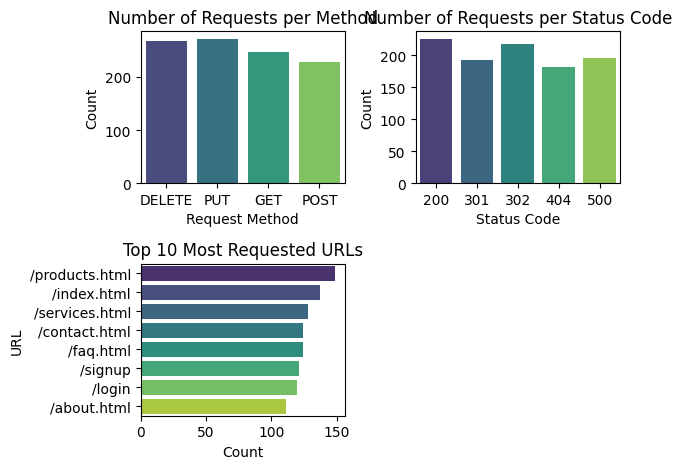

In [14]:
# Number of requests per method
plt.subplot(2, 2, 1)
sns.countplot(x='method', data=df, palette='viridis')
plt.title('Number of Requests per Method')
plt.xlabel('Request Method')
plt.ylabel('Count')

# Number of requests per status code
plt.subplot(2, 2, 2)
sns.countplot(x='status', data=df, palette='viridis')
plt.title('Number of Requests per Status Code')
plt.xlabel('Status Code')
plt.ylabel('Count')

# Top 10 most requested URLs
plt.subplot(2, 2, 3)
top_urls = df['url'].value_counts().head(10)
sns.barplot(x=top_urls.values, y=top_urls.index, palette='viridis')
plt.title('Top 10 Most Requested URLs')
plt.xlabel('Count')
plt.ylabel('URL')

# Show the plots
plt.tight_layout()
plt.show()